This notebook generates the network diagram using networkX using the network diagram

In [19]:
import pandas as pd
import networkx as nx

In [20]:
directory = '../test/'

In [21]:
network_df = pd.read_csv(directory+'network.csv', index_col=0)

In [25]:
network_df.head()

,user1,user2,type
0,John,John,Tweet
1,Harmony,Leo,RT
2,John,John,Tweet
3,Jessica,Cathy,RT
4,Leo,John,RT


In [28]:
rt_in = network_df.type=='RT'
rts = network_df[rt_in]
tweets = network_df.drop(index= rts.index)

In [36]:
graph = nx.DiGraph()

In [39]:
graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')

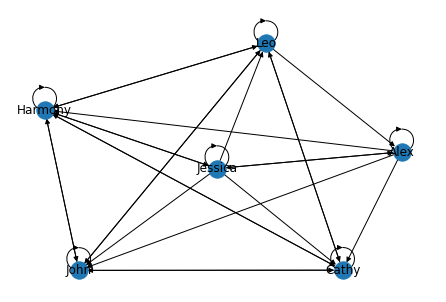

In [41]:
nx.draw(graph, with_labels = True)

In [43]:
graph.degree()

DiDegreeView({'Harmony': 11, 'Leo': 10, 'Jessica': 9, 'Cathy': 10, 'John': 10, 'Alex': 8})

In [47]:
nx.algorithms.centrality.betweenness.betweenness_centrality(graph)

{'Harmony': 0.1375,
 'Leo': 0.125,
 'Jessica': 0.037500000000000006,
 'Cathy': 0.0125,
 'John': 0.0125,
 'Alex': 0.025}

In [49]:
nx.algorithms.centrality.closeness.closeness_centrality(graph)

{'Harmony': 1.0,
 'Leo': 0.8333333333333334,
 'Jessica': 0.625,
 'Cathy': 1.0,
 'John': 1.0,
 'Alex': 0.625}